# CS3237 Lab 4 - Neural Networks and Deep Learning

**Name: Javon Teo Tze Kai**

**Student Number: A0233706J**

**Lab Group: B02**


## 1. Introduction

The objectives of this lab are:

    1. To familiarize you with how to encode input and output vectors for neural networks.
    2. To give you some insight into how hyperparameters like learning rate and momentum affect training.
    3. To create, test and train, a CNN deep learning model using the MNIST dataset.
    
To save time we will train each experiment only for 10 epochs. This will lead to less than optimal results but is enough for you to make observations.

## 2. The Irises Dataset

We will now work again on the Irises Dataset, which we used in Lab 3, for classifying iris flowers into one of three possible types. As before we will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

In this dataset there are 150 sample points. The code below loads the dataset and prints the first 10 rows so we have an idea of what it looks like.

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris()

print("First 10 rows of data:")
print(iris.data[:10])

First 10 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 2.2 Scaling the Data

We make use of the MinMaxScaler to scale the inputs to between 0 and 1.  The code below does this and prints the first 10 rows again, to show us the difference.

In the next section we will investigate what happens if we use unscaled data.

In [25]:
scaler = MinMaxScaler()
scaler.fit(iris.data)
X = scaler.transform(iris.data)
Y = iris.target

print("First 10 rows of SCALED data.")
print(X[:10])

First 10 rows of SCALED data.
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


### 2.3 Encoding the Targets

In Lab 3 we saw that the target values (type of iris flower) is a vector from 0 to 2. We can see the 150 labels below:


In [26]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can use this to train the neural network, but we will use "one-hot" encoding, where we have a vector of _n_ integers consisting of 0's and 1's.  The table below shows how one-hot encoding works:

|   Value    |    One-Hot Encoding    |
|:----------:|:----------------------:|
| 0 | \[1 0 0\] |
| 1 | \[0 1 0\] |
| 2 | \[0 0 1\] |

Pytorch provides the one_hot function to create one-hot vectors:



In [27]:
import torch
import torch.nn.functional as F

print(F.one_hot(torch.tensor(iris.target).to(torch.int64), 3))

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 

Now let's split the data into training and testing data:



In [28]:
from torch.utils.data import TensorDataset, DataLoader

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 1)
train_x = torch.Tensor(train_x)
train_y = F.one_hot(torch.tensor(train_y).to(torch.int64), 3).to(torch.float32)

test_x = torch.Tensor(test_x)
test_y = F.one_hot(torch.tensor(test_y).to(torch.int64), 3).to(torch.float32)

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)

### 2.4 Building our Neural Network

Let's now begin building a simple neural network with a single hidden layer, using the Stochastic Gradient Descent (SGD) optimizer, ReLu transfer functions for the hidden layer and softmax for the output layer.

The code to do this is shown below:

In [65]:
import torch.nn as nn
import torch.optim as optim

class ModelNN(nn.Module):
    def __init__(self):
        super(ModelNN, self).__init__()
        self.l1 = nn.Linear(4, 100)
        self.l2 = nn.Linear(100, 3)
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        output = self.l2(x)
        return output

model = ModelNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.1)

### 2.5 Training the Neural Network

As is usually the case, we can call the "fit" method to train the neural network for 10 epochs. You can increase this to a larger value if you want.

In [66]:
# Train the Model
num_epochs = 100
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for input, labels in train_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Training accuracy of the model: {100 * correct / total} %')

with torch.no_grad():
    correct = 0
    total = 0
    i = 0
    for input, labels in test_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Test accuracy of the model: {100 * correct / total} %')

Epoch [5/100], Loss: 0.0076
Epoch [10/100], Loss: 0.0019
Epoch [15/100], Loss: 0.0015
Epoch [20/100], Loss: 0.0009
Epoch [25/100], Loss: 0.0006
Epoch [30/100], Loss: 0.0004
Epoch [35/100], Loss: 0.0003
Epoch [40/100], Loss: 0.0003
Epoch [45/100], Loss: 0.0003
Epoch [50/100], Loss: 0.0002
Epoch [55/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0002
Epoch [65/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0001
Epoch [75/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [85/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [95/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
Training complete!
Training accuracy of the model: 95.0 %
Test accuracy of the model: 100.0 %


---
#### Question 1

Run the code above. Do you see evidence of underfitting? Overfitting? Justify your answers. ***(4 MARKS)***

**Answer: There is no evidence of underfitting or overfitting, because the training (93.3%) and test accuracy (100.0%) are about the same, and they also quite accurate in predicting the model. There is no evidence of overfitting, because the test accuracy is larger than the training accuracy.**

_(For TA) Marks awarded: ____ / 4_

---

#### Question 2a

Consult the documentation for the SGD optimizer [here](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). What does the lr parameter do? ***(1 MARK)***

**Answer: The lr parameter influences how quickly the weights of the model are adjusted at each step.**

#### Question 2b

The momentum parameter "accelerates gradient descent in the relevant direction and dampens oscillations". Using Google or other means, illustrate what this means. ***(2 MARKS)***

**Answer: The momentum parameter smoothens the gradient descent process by accumulating past gradients, helping gradient descent to move consistently in the same direction. From the image found by Google:
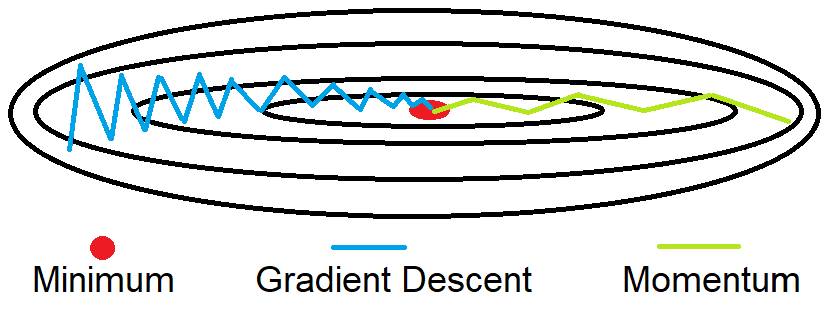, when the momentum parameter is 0 (blue line), the gradient descent is not smooth, while when there is momentum (yellow line), the gradient descent is smoother.**

_(For TA) Marks awarded: ____ / 3_

----

#### Question 3a

We will now play with the lr parameter. Adjust the lr parameter to the following values and record the final training and test accuracies in the respective columns. Also observe the sequence of accuracies over the training period, and place your observation in the "remarks" column, e.g. "Progresses steadily", "some oscillation" etc. ***(3 MARKS)***

**Answer: Fill the table below **

|  lr    | Training Acc. | Testing    Acc. |      Remarks      |
|:------:|---------------|-----------------|-------------------|
|0.01    |    93.33%     |    93.33%       |Progresses steadily, loss decreases steadily starting from 0.1780.|
|0.1     |    88.33%     |    93.33%       |Progresses steadily, loss decreases steadily starting from 0.0072.|
|1.0     |    69.17%     |    56.67%       |Model has low loss but low accuracy, the loss oscillates around 0.|
|10.0    |    32.50%     |    36.67%       |Loss oscillates around 9-10.|
|100     |    32.50%     |    36.67%       |Loss oscillates around 108.|
|1000    |    32.50%     |    36.67%       |Loss oscillates around 1017.|
|10000   |    32.50%     |    36.67%       |Loss oscillates around 8532.|
|100000  |    32.50%     |    36.67%       |Loss oscillates around 104392.|


#### Question 3b

Based on your observations above, comment on the effect of small and very large learning rates on the learning. ***(2 MARKS)***

**Answer: When the learning rate is small and not optimal, it leads to slow convergence and this may give a bad training and testing accuracy if the number of epochs is small. When the learning rate is very large, it may overshoot or oscillate around the optimal solution and hence also give bad training and testing accuracy.**

_(For TA) Marks awarded: ____ / 5_

### 2.5 Using Momentum

We will now experiment with the momentum term. To do this:

    1. Change the learning rate to 0.1.
    2. Set the momentum to 0.1. 
    
Run your neural network.

---

#### Question 4a

Keeping the learning rate at 0.1, complete the table below using the momentum values shown. Again record any observations in the "Remarks" column. ***(3 MARKS)***

**Answer: Fill the table below**

| momentum | Training Acc. | Testing    Acc. |      Remarks      |
|:--------:|---------------|-----------------|-------------------|
|0.001     |     89.17%    |     93.33%      |Progresses steadily|
|0.01      |     88.33%    |     93.33%      |Progresses steadily|
|0.1       |     85.83%    |     90.00%      |Progresses steadily|
|1.0       |     30.83%    |     43.33%      |Much Oscillation|

#### Question 4b

Based on your observations above, does the momentum term help in learning? ***(2 MARKS)***

**Answer: The momentum term may help in learning, but this depends on its value. If it is too high, it may overshoot the optimal solution.**

_(For TA) Marks awarded: ____ / 5_

---


----
## 4. Creating a CNN for the MNIST Dataset

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in Lecture 5. Let's build each part step by step.

### 4.1 Loading the MNIST Dataset

As in the Neural Network example from Lecture 5 we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data. We will use a batch size of 1 for now, you may want to try other values for your training.

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

batch_size = 1

# Load the data, and normalise it.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Change target to a one hot vector.
target_transform = transforms.Compose(
    [transforms.Lambda(lambda x: F.one_hot(torch.tensor(x), 10))])

training_set = datasets.MNIST('data', train=True, download=True, transform=transform, target_transform=target_transform)
test_set = datasets.MNIST('data', train=False, transform=transform, target_transform=target_transform)
train_loader = torch.utils.data.DataLoader(training_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size)

### 4.2 Create your CNN network

Create your CNN network using pytorch (Hint: you may look at the CNN example from lecture 6). You should minimally have two convolutional layers, two maxpool layers, and at least one dense (linear) layer for the output. Use activation functions between layers such as `relu` or `softmax`. Pay careful attention to the size of the inputs and outputs. 

Write your class in the cell below and implement both the `constructor` and the `forward` function.

In [16]:
"""
    Enter your code for part 4.2 here in this code cell.
"""
class CNNModel(nn.Module):
    def __init__(self):
        # call the parent constructor
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (5,5))
        self.maxpool = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (5,5))
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        output = self.fc1(x)
        return output

model = CNNModel()

### 4.3 Train your CNN network

Now train your network on the training dataset. You should train for 50 to 100 epochs.

You will have to decide on which optimizer to use (SGD, adam, for example), which loss function you will use, and any other hyperparameters such as learning rate, batch size, and momentum.

Write your code to train in the cell below.

In [17]:
"""
    Enter your code for part 4.3 here in this code cell.
"""
# define training hyperparameters
lr = 1e-5
num_epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

model.to(device)

for e in range(0, num_epochs):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for i, (x, y) in enumerate(train_loader):
		# send the input to the device
		(x, y) = (x.to(device), y.to(torch.float32).to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = criterion(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
	print("Epoch", e, "Training Loss:", totalTrainLoss.item())

Epoch 0 Training Loss: 23315.81640625
Epoch 1 Training Loss: 6754.41162109375
Epoch 2 Training Loss: 4841.7705078125
Epoch 3 Training Loss: 3952.482421875
Epoch 4 Training Loss: 3408.28125
Epoch 5 Training Loss: 3028.119384765625
Epoch 6 Training Loss: 2741.784912109375
Epoch 7 Training Loss: 2512.85986328125
Epoch 8 Training Loss: 2322.572998046875
Epoch 9 Training Loss: 2161.57470703125
Epoch 10 Training Loss: 2023.096435546875
Epoch 11 Training Loss: 1900.8817138671875
Epoch 12 Training Loss: 1792.36767578125
Epoch 13 Training Loss: 1694.1556396484375
Epoch 14 Training Loss: 1606.1148681640625
Epoch 15 Training Loss: 1525.03564453125
Epoch 16 Training Loss: 1449.6240234375
Epoch 17 Training Loss: 1379.112548828125
Epoch 18 Training Loss: 1313.6612548828125
Epoch 19 Training Loss: 1252.3280029296875
Epoch 20 Training Loss: 1194.19140625
Epoch 21 Training Loss: 1140.1312255859375
Epoch 22 Training Loss: 1088.5277099609375
Epoch 23 Training Loss: 1039.49267578125
Epoch 24 Training Loss

### 4.4 Test your CNN network

Now test your network on the test dataset. Print out the accuracy of your model. 

Try modifying your model and choosing different hyperparameters and see if you can improve the accuracy of your model. 

Write your code to test in the cell below.

In [20]:
"""
    Enter your code for part 4.4 here in this code cell.
"""
import numpy as np
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

#Get Training Accuracy
#track train loss
train_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for i, (x, y) in enumerate(train_loader):
	# send the input to the device
	(x, y) = (x.to(device), y.to(torch.float32).to(device))
	output = model(x)
	# calculate the batch loss
	loss = criterion(output, y)
	# update train loss 
	train_loss += loss.item() * x.size(0)
	# convert output probabilities to predicted class
	_, pred = torch.max(output, 1)
	_, y = torch.max(y, 1)
	# compare predictions to true label
	correct_tensor = pred.eq(y)
	correct = np.squeeze(correct_tensor)
    # calculate train accuracy for each object class
	for i in range(len(y.data)):
		label = y.data[i]
		class_correct[label] += correct.item() 
		class_total[label] += 1

# average train loss
train_loss = train_loss/len(train_loader.dataset)
print('Train Loss: {:.6f}\n'.format(train_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Train Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100.0 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Train Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTrain Accuracy (Overall): %2d%% (%2d/%2d)\n' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))



#Get Test Accuracy
#track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for i, (x, y) in enumerate(test_loader):
	# send the input to the device
	(x, y) = (x.to(device), y.to(torch.float32).to(device))
	output = model(x)
	# calculate the batch loss
	loss = criterion(output, y)
	# update test loss 
	test_loss += loss.item() * x.size(0)
	# convert output probabilities to predicted class
	_, pred = torch.max(output, 1)
	_, y = torch.max(y, 1)
	# compare predictions to true label
	correct_tensor = pred.eq(y)
	correct = np.squeeze(correct_tensor)
    # calculate test accuracy for each object class
	for i in range(len(y.data)):
		label = y.data[i]
		class_correct[label] += correct.item() 
		class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100.0 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Train Loss: 0.004686

Train Accuracy of     0: 100% (5923/5923)
Train Accuracy of     1: 99% (6740/6742)
Train Accuracy of     2: 99% (5952/5958)
Train Accuracy of     3: 99% (6100/6131)
Train Accuracy of     4: 99% (5841/5842)
Train Accuracy of     5: 100% (5421/5421)
Train Accuracy of     6: 99% (5914/5918)
Train Accuracy of     7: 99% (6235/6265)
Train Accuracy of     8: 99% (5842/5851)
Train Accuracy of     9: 99% (5933/5949)

Train Accuracy (Overall): 99% (59901/60000)

Test Loss: 0.067711

Test Accuracy of     0: 99% (979/980)
Test Accuracy of     1: 100% (1135/1135)
Test Accuracy of     2: 99% (1022/1032)
Test Accuracy of     3: 98% (996/1010)
Test Accuracy of     4: 99% (978/982)
Test Accuracy of     5: 99% (884/892)
Test Accuracy of     6: 98% (943/958)
Test Accuracy of     7: 98% (1012/1028)
Test Accuracy of     8: 98% (961/974)
Test Accuracy of     9: 98% (990/1009)

Test Accuracy (Overall): 99% (9900/10000)


#### Question 5:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the lr, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (4 MARKS)

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |Adam|Adam optimizer is able to adaptively adjusts the learning rate, allowing for optimum learning. It also includes a momentum-like term to smooth out the updates of weight. This helps the CNN learn faster and converge more quickly.|
| Input shape          |(1, 1, 28, 28)|A small batch size of 1 is picked due to hardware and time constraints. Number of channels is set to 1 because the input images have only 1 channel as they are grayscale images. Each image is 28x28 image.|
| First layer          |Convolution layer of 1 input channel, 32 output channels, (5, 5) kernel size|1 input channel due to greyscale input images. Based on research and experimentation, using 32 filters yields good results with sufficient feature representation, and without sacrificing significant computational costs. Kernel size of (5, 5) was chosen as it can capture complex local patterns and relationships within a moderately sized region.|
| Second layer         |Convolution layer of 32 input channel, 64 output channels, (5, 5) kernel size|32 input channel due to previous convulational layer. The number of output channels was increased to 64 to allow the network to learn increasingly complex features and patterns. Kernel size of (5, 5) was unchanged from the previous layer.|
| Pooling layers       |Max Pooling of kernel size (2,2) and stride (2,2). Used after each Convolution layer.|In MNIST, the digits are represented in white colour against a black background. This makes Max Pooling suitable for MNIST as it is able to extract the dominant brighter pixels from the image, making the model shift invariant and less noise sensitive. The kernel size (2, 2) and stride (2, 2) reduces the spatial dimensions of the feature maps to appropriate amounts.|
| Dense layer          |Linear|Based on research and experiementation, a linear dense layer is suitable to learn the complex relationships between features in the data.|
| learning rate?       |1e-5|A small learning rate of 1e-5 was used as the Adam optimizer is designed to handle adjusting the learning rate, and this learning rate is a good starting point for the optimizer.|
| momentum?            |0|The momentum is set to 0. As I am using Adam optimizer, it already includes adaptive momentum, hence it would not be necessary to use it with an added momentum and might even lead to instability and worse performance.|
| loss function?       |Cross-Entropy Loss|Cross-Entropy Loss function is commonly used for classification problems. It can calculate the difference between the predicated and true probabilites, and it has a smooth shape which makes it easier for gradient-based optimization methods to find the global minimum. Hence, it is suited for image classification of MNIST dataset.|

*FOR GRADER:* <br>
*TABLE: _____ / 4* <br>
*CODE: ______ / 10*<br>

***TOTAL: ______ / 14 ***

#### Question 6

What is the final training and test accuracy that you obtained after 100 epochs. Are there signs of underfitting or overfitting? Explain your answer (4 MARKS)

**The final training and test accuracy is both 99%. There are no signs of underfitting, because both training and test accuracy are high, indicating that the model has learned the underlying patterns in the data effectively. There are also no signs of overfitting, because the test accuracy is not lower than the training accuracy, indicating that the model did not just memorize the training data and it can perform well on data it has not seen before.**

*FOR GRADER: ______ / 4*

----

## 5 Conclusion

In this lab we saw how to create a simple Dense neural network to complete the relatively simple task of learning how to classify irises according to their sepal and petal characteristics. We then tried using a CNN on the MNIST dataset. 

---

***FOR TA ONLY***

| Question |  Marks  |
|:--------:|:-------:|
|1         |     /4  |
|2         |     /3  |
|3         |     /5  |
|4         |     /5  |
|5         |     /14 |
|6         |     /4  |
|Total:    |     /35 |

